In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mean = [0, 0]
cov = [[10, 0], [0, 100]]  # diagonal covariance

In [5]:
x, y = np.random.multivariate_normal(mean, cov, 5000).T

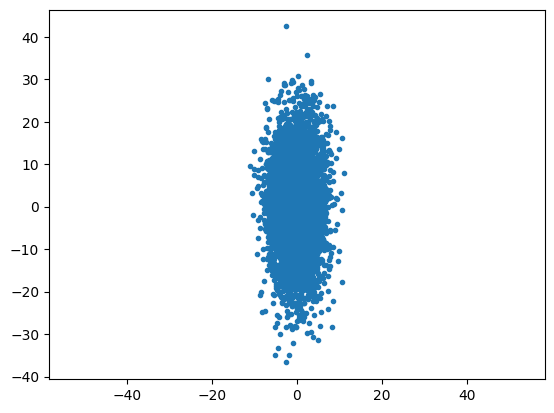

In [6]:
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

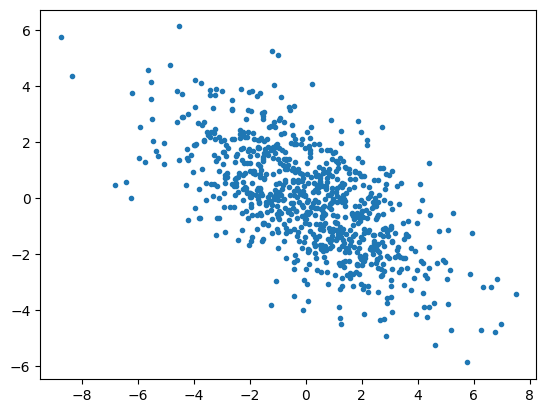

In [7]:
cov = np.array([[6, -3], [-3, 3.5]])  # off-diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, size=800).T
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

In [8]:
hh, *_ = np.histogram2d(x, y, bins=10, density=True)

In [9]:
px, *_ = np.histogram(x,bins=10,density=True)

In [10]:
def entropy_from_probs(probs):
	return -np.sum(probs * np.log(probs, out=np.zeros(probs.shape), where=(probs!=0))) / np.log(2)

In [11]:
def mutual_info_from_xy(x,y,bins=10):
	p_x, *_ = np.histogram(x,bins=bins,density=True) 
	p_y, *_ = np.histogram(y,bins=bins,density=True) 
	p_xy, *_ = np.histogram2d(x, y, bins=bins, density=True)
	return entropy_from_probs(p_x) + entropy_from_probs(p_y) - entropy_from_probs(p_xy)

In [12]:
mean = [0, 0]
cov = np.array([[6, -3], [-3, 3.5]])  # off-diagonal covariance -> dependence
x, y = np.random.multivariate_normal(mean, cov, 10000).T

In [13]:
mutual_info_from_xy(x,y)

1.6690448501023263

In [14]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance -> indep
x, y = np.random.multivariate_normal(mean, cov, 10000).T

In [15]:
p_y, *_ = np.histogram(y,bins=10,density=True)

In [16]:
p_y

array([0.00119215, 0.01364347, 0.08278807, 0.23008462, 0.36598952,
       0.3524785 , 0.1959097 , 0.06636292, 0.01483562, 0.00132461])

In [17]:
p_xy, *_ = np.histogram2d(x, y, bins=10, density=True)

In [18]:
c = p_xy

In [19]:
- np.sum(c * np.log2(c, out=np.zeros(c.shape), where=(c!=0)))

7.198692471307261

In [20]:
np.corrcoef(x,y)[0, 1]

-0.003089600813378626

In [21]:
means = [0., 0.]
stds = [1., 1.]
corr = 0.1
cov = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr, stds[1]**2]]

In [22]:
from scipy.stats import multivariate_normal
normal = multivariate_normal(means, cov)

In [23]:
N = 800

In [24]:
normal.rvs(size=N).T

array([[-0.74755051,  2.08030905,  0.10045392, ..., -0.73296098,
         0.57680998, -0.43080553],
       [ 0.79716086,  0.11863734, -0.1773236 , ..., -0.12234877,
         0.84849954,  2.131463  ]])

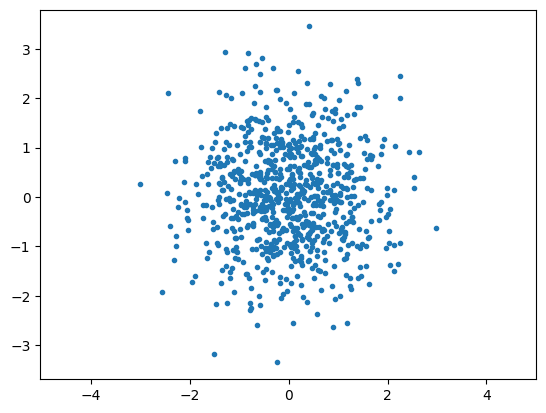

In [25]:
x, y = normal.rvs(size=N).T
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

In [26]:
cov

[[1.0, 0.1], [0.1, 1.0]]

In [27]:
xx = np.random.rand(10,2)

In [28]:
import torch
import sys
sys.path.insert(0, '..')

In [29]:
import src.util as uti

In [30]:
xt = torch.from_numpy(xx).to(uti.device)

In [31]:
xt

tensor([[0.5693, 0.0954],
        [0.9543, 0.9582],
        [0.5589, 0.6164],
        [0.3196, 0.5388],
        [0.8628, 0.8170],
        [0.5365, 0.5140],
        [0.4771, 0.6002],
        [0.2149, 0.0152],
        [0.0154, 0.4816],
        [0.9052, 0.0534]], dtype=torch.float64)

In [32]:
xt.squeeze()

tensor([[0.5693, 0.0954],
        [0.9543, 0.9582],
        [0.5589, 0.6164],
        [0.3196, 0.5388],
        [0.8628, 0.8170],
        [0.5365, 0.5140],
        [0.4771, 0.6002],
        [0.2149, 0.0152],
        [0.0154, 0.4816],
        [0.9052, 0.0534]], dtype=torch.float64)

In [31]:
xt[:3]

tensor([0.3031, 0.6872, 0.1667], dtype=torch.float64)

In [32]:
xt[:None]

tensor([0.3031, 0.6872, 0.1667, 0.9645, 0.8433, 0.2970, 0.4701, 0.4519, 0.8772,
        0.4387], dtype=torch.float64)

In [33]:
xt[None:]

tensor([0.3031, 0.6872, 0.1667, 0.9645, 0.8433, 0.2970, 0.4701, 0.4519, 0.8772,
        0.4387], dtype=torch.float64)

In [34]:
configs_random = [(f'corr {corr:.01f}',corr) for corr in np.arange(0.,1.,0.1)]

In [35]:
from scipy.stats import multivariate_normal

In [36]:
def generate_random_variables(N=int(1e5), corr=0., means=[0.0, 0.0], stds=[1.0, 1.0], train_test_split=None):

    cov = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr, stds[1]**2]]
    normal = multivariate_normal(means, cov) 
    A, B = normal.rvs(size=N).T
    A = torch.from_numpy(A).to(uti.device)
    B = torch.from_numpy(B).to(uti.device)

    return A[:train_test_split], B[:train_test_split], A[train_test_split:], B[train_test_split:]

In [37]:
configs_random = [(f'corr {corr:.01f}',corr) for corr in np.arange(0.,1.,0.1)]

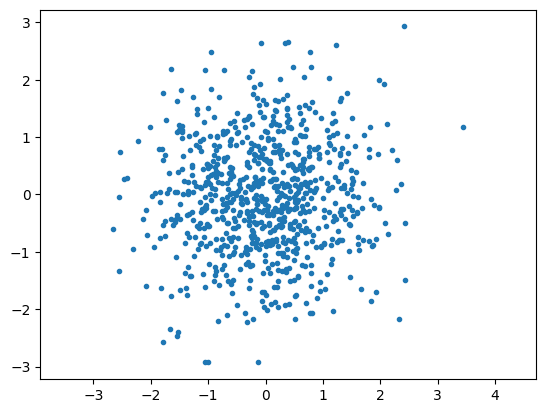

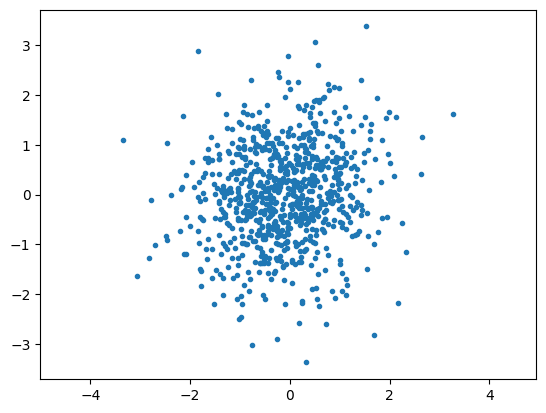

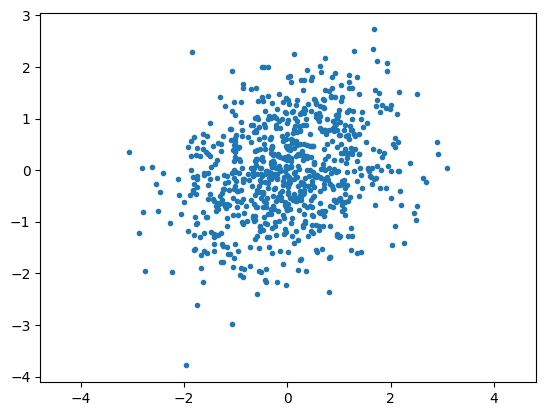

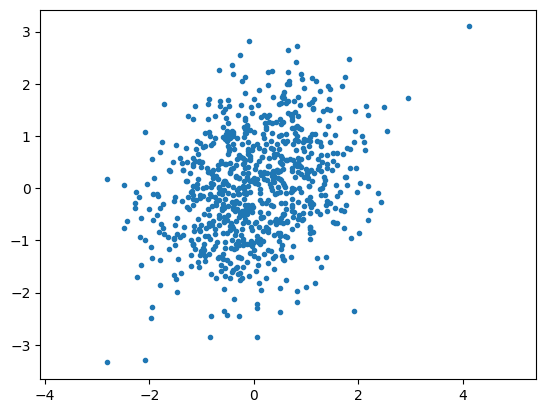

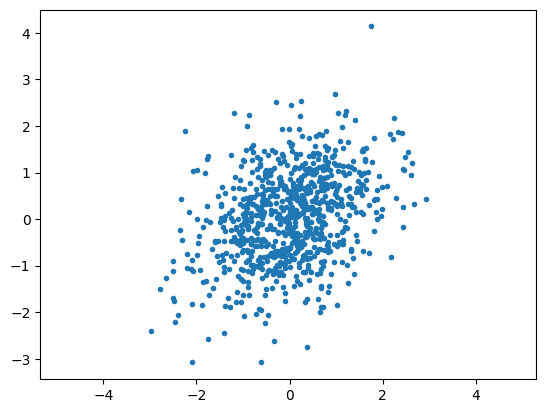

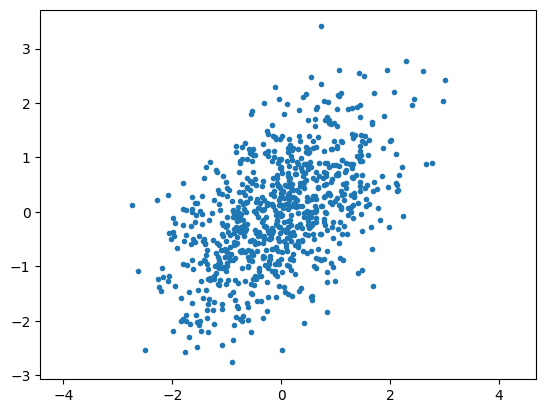

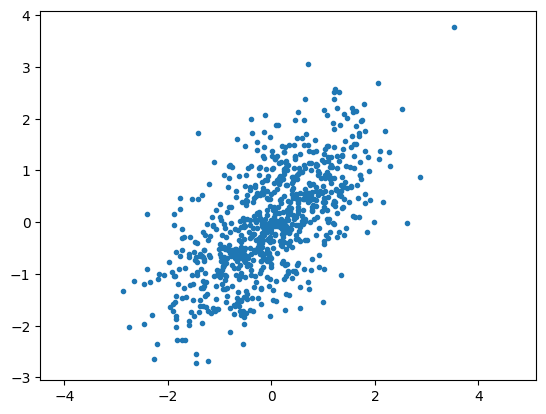

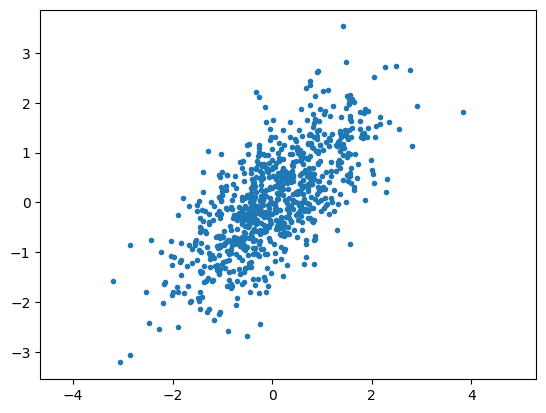

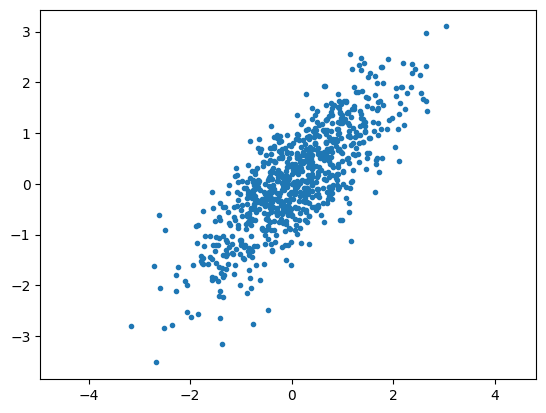

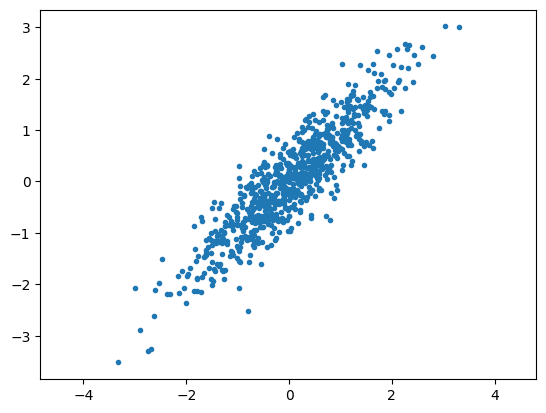

In [38]:
for config_name, corr in configs_random:
    A_train, B_train, A_test, B_test = generate_random_variables(800, corr)
    plt.figure()
    plt.plot(A_train, B_train, '.')
    plt.axis('equal')
    plt.show()

In [39]:
from sklearn import feature_selection

In [40]:
for config_name, corr in configs_random:
    A_train, B_train, A_test, B_test = generate_random_variables(800, corr)
    mi = feature_selection.mutual_info_regression(A_train.reshape(-1, 1), B_train)
    print(f'corr {corr:.01f}: MI {mi}')

corr 0.0: MI [0.00143215]
corr 0.1: MI [0.01615059]
corr 0.2: MI [0.04942975]
corr 0.3: MI [0.05174361]
corr 0.4: MI [0.10396113]
corr 0.5: MI [0.16825088]
corr 0.6: MI [0.1986607]
corr 0.7: MI [0.3088033]
corr 0.8: MI [0.54907216]
corr 0.9: MI [0.80212503]


In [41]:
A_train

tensor([-5.6343e-01, -3.7080e-01,  4.7225e-01, -4.6378e-01, -7.9889e-01,
         8.7596e-01,  8.6280e-01,  5.8462e-01, -1.1692e+00,  3.0221e-01,
         1.0999e-01, -1.7875e+00,  1.1095e+00, -7.4012e-01, -4.9345e-01,
         1.1844e+00,  9.5199e-01,  7.2696e-01, -3.5956e-01, -1.0631e+00,
         6.0365e-01,  1.4932e-01,  4.8134e-01, -2.1059e+00,  5.7328e-01,
        -7.2272e-01, -1.3800e+00,  6.7644e-01, -6.2917e-01,  7.7308e-01,
         1.1107e+00,  1.4500e+00,  4.6874e-01,  6.7560e-01,  1.3244e+00,
        -8.3033e-01, -7.3326e-01,  8.7853e-01,  1.4943e+00, -4.4162e-01,
         1.0002e+00, -2.2657e-01,  1.7779e+00, -1.0095e+00, -1.2778e-01,
         1.9544e+00, -1.4960e+00,  6.0819e-01, -1.0612e+00,  2.3524e+00,
         6.1433e-01,  2.7687e-01, -1.2127e+00, -2.9012e-01,  4.6166e-01,
        -1.2026e-01, -5.7471e-01, -1.2519e+00,  1.3336e+00,  6.9959e-01,
         8.6510e-01, -1.9681e+00,  2.7849e-01,  8.3332e-01,  2.4426e-01,
        -3.6852e-01, -8.0768e-01,  7.2379e-01,  4.6

In [42]:
x, y = np.random.multivariate_normal(means, cov, size=10).T

In [43]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
var.pdf([1,0])

0.09653235263005393

In [45]:
import scipy

In [46]:
n1 = scipy.stats.norm()

In [8]:
tt = True
ll = [1,2,3] + ([4,5] if tt else [])

In [9]:
ll

[1, 2, 3, 4, 5]